## Job Skills Analysis

Questions to answer:
<small>
1. What are the skills most in demand for the most popular data roles?<br>
2. How are in-demand skills trending for Data Analysts?
</small>
<br>




### Importing Libraries and Dataset
<hr>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# importing cleaned dataset
df = pd.read_csv('data_cleaned_jobs.csv')
df.head()

# data parsing
df['job_posted_date'] = pd.to_datetime(df.job_posted_date).dt.date
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

#### Skills count per job title
<hr>

In [2]:
# exploding the skills list
df_exploded = df[df.job_skills.notna()].explode('job_skills', ignore_index=True)
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,job_posted_date,job_health_insurance,job_country,salary_year_avg,company_name,job_skills
0,Data Analyst,Sr Data Analyst,"Tampa, FL",via Trabajo.org,Full-time,False,2023-01-01,False,United States,100000.00,"TWO95 International, Inc",sql
1,Data Analyst,Sr Data Analyst,"Tampa, FL",via Trabajo.org,Full-time,False,2023-01-01,False,United States,100000.00,"TWO95 International, Inc",sql server
2,Data Analyst,Sr Data Analyst,"Tampa, FL",via Trabajo.org,Full-time,False,2023-01-01,False,United States,100000.00,"TWO95 International, Inc",excel
3,Data Analyst,Sr Data Analyst,"Tampa, FL",via Trabajo.org,Full-time,False,2023-01-01,False,United States,100000.00,"TWO95 International, Inc",ssrs
4,Data Analyst,Sr Data Analyst,"Tampa, FL",via Trabajo.org,Full-time,False,2023-01-01,False,United States,100000.00,"TWO95 International, Inc",power bi
...,...,...,...,...,...,...,...,...,...,...,...,...
899801,Data Scientist,"Manager, Data Science","Austin, TX",via Atlassian Talent Community,Full-time,False,2023-12-31,True,United States,138718.75,Atlassian,atlassian
899802,Data Scientist,Lead Data Scientist,"Irving, IL",via WhatJobs,Full-time,False,2023-12-31,False,United States,130000.00,Vistra Corporate Services Company,python
899803,Data Scientist,Lead Data Scientist,"Irving, IL",via WhatJobs,Full-time,False,2023-12-31,False,United States,130000.00,Vistra Corporate Services Company,sql
899804,Data Scientist,Lead Data Scientist,"Irving, IL",via WhatJobs,Full-time,False,2023-12-31,False,United States,130000.00,Vistra Corporate Services Company,sas


In [3]:
# skills count
df_skills_count = df_exploded.groupby(['job_title_short', 'job_skills'])['job_title_short'].count()

# job titles 
job_titles = df['job_title_short'].value_counts().index

# top 5 skills for each job title
top_skills = {}
for title in job_titles:
   top_5_skills = df_skills_count.loc[title].sort_values(ascending=False).head(5)
   top_skills[title] = top_5_skills

top_skills['Business Analyst']

job_skills
sql         3044
excel       2733
tableau     1956
power bi    1359
python      1232
Name: job_title_short, dtype: int64

### Plotting skills count
<hr>

1. Plotting skills count for junior roles

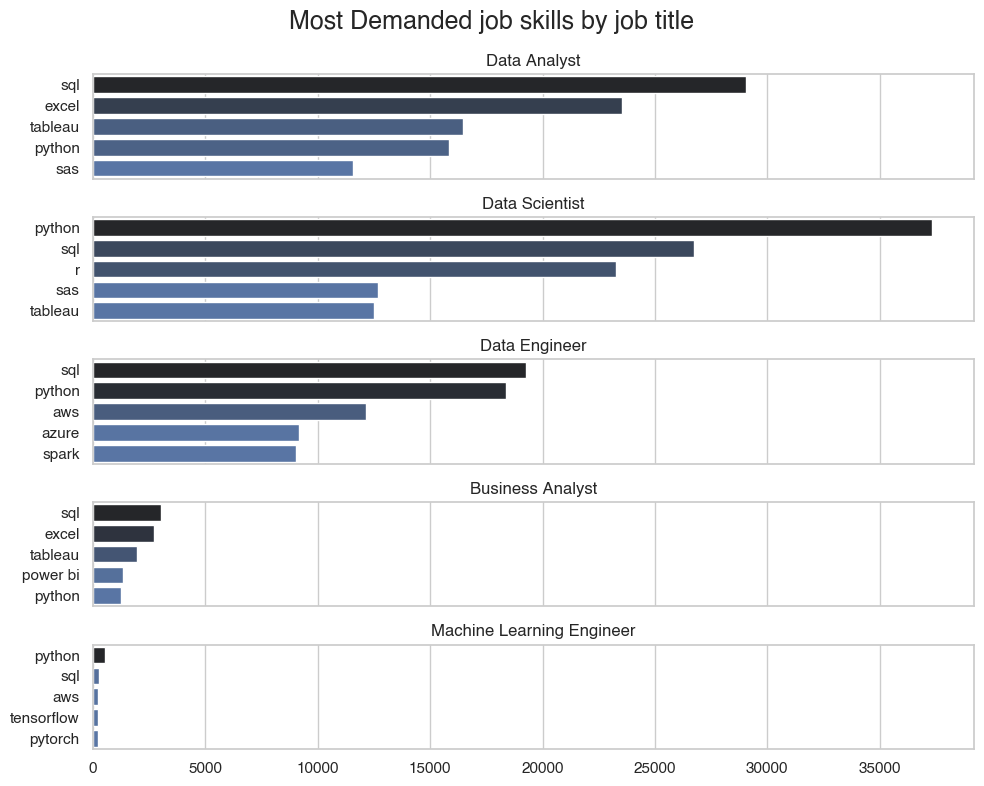

In [4]:
# finding junior roles
junior_roles = [x for x in job_titles if 'Senior' not in x]

# plotting top 5 skills count for junior roles
sns.set_theme(style="whitegrid", context='notebook', palette='deep', font='Helvetica')
fig, ax = plt.subplots(len(junior_roles), 1, figsize=(10,8), sharex=True)

for i, title in enumerate(junior_roles):
   data_series = top_skills[title].reset_index(name='count')

   sns.barplot(data=data_series, x='count', y='job_skills', ax=ax[i], hue='count', palette='dark:b_r')
   ax[i].set_ylabel('')
   ax[i].set_title(title)
   ax[i].legend().remove()
   ax[i].set_xlabel('')

fig.suptitle('Most Demanded job skills by job title', fontsize=18, fontweight='bold')
fig.tight_layout()

### Convert Counts to Percentages
<hr>